#CASOS DE DENGUE Y ZIKA EN ARGENTINA - AÑO 2024


El Ministerio de Salud, a través del Área de Vigilancia de la Dirección Nacional de Epidemiología, publica datos sobre diversos eventos de interés sanitario. En este caso, se analizarán los registros de casos de dengue y zika correspondientes al año 2024.

Fuente de los datos:  http://datos.salud.gob.ar/dataset/vigilancia-de-dengue-y-zika/archivo/e57edd84-096d-4348-9137-2f5dae9c8f55

#1. Obtención de los datos

In [56]:
#Se importan los datos tabulares a analizar
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df1=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/casos_de_dengue_y_zika_2024.csv', encoding='latin1', sep=';')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#DataFrame
df1.head()


id_depto_indec_residencia departamento_residencia  id_prov_indec_residencia  \
0                       999             desconocido                      99.0   
1                       999             desconocido                      99.0   
2                       999             desconocido                      99.0   
3                       999             desconocido                      99.0   
4                       999             desconocido                      99.0   

  provincia_residencia  anio_min  evento  id_grupo_etario  \
0          desconocida    2024.0  Dengue              6.0   
1          desconocida    2024.0  Dengue              1.0   
2          desconocida    2024.0  Dengue             10.0   
3          desconocida    2024.0  Dengue             12.0   
4          desconocida    2024.0  Dengue             12.0   

              grupo_etario  sepi_min  cantidad  
0          De 10 a 14 años      14.0       4.0  
1  Neonato (hasta 28 dÍas)      15.0       2.0  
2          De 35 a 44 años      12.0      82.0  
3       Mayores de 65 años      10.0      16.0  
4       Mayores de 65 años       4.0       3.0

##1.1. Diccionario de variables
Se detallan las variables del dataset utilizadas en el presente análisis.

| Nombre de la variable      | Tipo       | Descripción                                                                 |
|----------------------------|------------|------------------------------------------------------------------------------|
| `sepi_min`                 | Numérica   | Semana epidemiológica de notificación del caso                              |
| `provincia_residencia`     | Categórica | Provincia de residencia del caso                                            |
| `grupo_etario`             | Categórica | Grupo de edad al que pertenece el caso                                      |
| `cantidad`                 | Numérica   | Cantidad total de casos confirmados para ese grupo etario, provincia y departamento|     

A continuación, se detallan las variables generadas durante el análisis:

| Nombre de la variable      | Tipo       | Descripción                                                                 |
|----------------------------|------------|------------------------------------------------------------------------------|
|`porcentaje`               | Numérica   | Porcentaje de casos dentro de un grupo                                      |
| `%acumulado`               | Numérica   | Porcentaje acumulado de casos                                               |

#2. Limpieza de los datos

In [58]:
#Columnas de la tabla
df1.columns
print (df1.columns)

#Análisis de los datos
df1.info()

Index(['id_depto_indec_residencia', 'departamento_residencia',
       'id_prov_indec_residencia', 'provincia_residencia', 'anio_min',
       'evento', 'id_grupo_etario', 'grupo_etario', 'sepi_min', 'cantidad'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35257 entries, 0 to 35256
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_depto_indec_residencia  35257 non-null  object 
 1   departamento_residencia    35256 non-null  object 
 2   id_prov_indec_residencia   35256 non-null  float64
 3   provincia_residencia       35256 non-null  object 
 4   anio_min                   35256 non-null  float64
 5   evento                     35256 non-null  object 
 6   id_grupo_etario            35256 non-null  float64
 7   grupo_etario               35256 non-null  object 
 8   sepi_min                   35256 non-null  float64
 9   cantidad                   35256 non-

Observaciones:
1. Columnas como "id_depto_indec_residencia", "id_prov_indec_residencia" e "id_grupo_etario" pueden ser eliminadas ya que son redundantes.
2. En todas las columnas, excepto  "id_depto_indec_residencia", hay un dato faltante.
3. Verificar posibles duplicados y outliers.



###2.1. Tratamiento de columnas

In [59]:
#Eliminar columnas
#El nuevo data frame se denomina df, de esta forma se continua con el analisis sin las columnas eliminadas
df = df1.drop(columns=['id_depto_indec_residencia', 'id_prov_indec_residencia', 'id_grupo_etario'])
df

departamento_residencia provincia_residencia  anio_min  evento  \
0                 desconocido          desconocida    2024.0  Dengue   
1                 desconocido          desconocida    2024.0  Dengue   
2                 desconocido          desconocida    2024.0  Dengue   
3                 desconocido          desconocida    2024.0  Dengue   
4                 desconocido          desconocida    2024.0  Dengue   
...                       ...                  ...       ...     ...   
35252                 Formosa              Formosa    2024.0  Dengue   
35253                  Patiño              Formosa    2024.0  Dengue   
35254                 Rosario             Santa Fe    2024.0  Dengue   
35255                  Patiño              Formosa    2024.0  Dengue   
35256                     NaN                  NaN       NaN     NaN   

                  grupo_etario  sepi_min  cantidad  
0              De 10 a 14 años      14.0       4.0  
1      Neonato (hasta 28 dÍas)      15.0       2.0  
2              De 35 a 44 años      12.0      82.0  
3           Mayores de 65 años      10.0      16.0  
4           Mayores de 65 años       4.0       3.0  
...                        ...       ...       ...  
35252          De 45 a 65 años      52.0       1.0  
35253          De 25 a 34 años      41.0       1.0  
35254          De 20 a 24 años      47.0       1.0  
35255          De 35 a 44 años      44.0       1.0  
35256                      NaN       NaN       NaN  

[35257 rows x 7 columns]

In [60]:
df.columns


Index(['departamento_residencia', 'provincia_residencia', 'anio_min', 'evento',
       'grupo_etario', 'sepi_min', 'cantidad'],
      dtype='object')

###2.2. Valores Faltantes

In [61]:
df.isnull().sum()


departamento_residencia    1
provincia_residencia       1
anio_min                   1
evento                     1
grupo_etario               1
sepi_min                   1
cantidad                   1
dtype: int64

Se observa que todas las columnas presentan al menos un valor nulo. En particular, aquellas filas que carezcan de información en al menos una de las variables clave —grupo etario, provincia o semana epidemiológica — no serán consideradas en el análisis, con el fin de preservar la calidad y consistencia del conjunto de datos.


In [62]:
#Eliminar valores nulos
df_limpio = df.dropna(subset=['grupo_etario', 'provincia_residencia', 'sepi_min'])
df_limpio


departamento_residencia provincia_residencia  anio_min  evento  \
0                 desconocido          desconocida    2024.0  Dengue   
1                 desconocido          desconocida    2024.0  Dengue   
2                 desconocido          desconocida    2024.0  Dengue   
3                 desconocido          desconocida    2024.0  Dengue   
4                 desconocido          desconocida    2024.0  Dengue   
...                       ...                  ...       ...     ...   
35251         Lomas de Zamora         Buenos Aires    2024.0  Dengue   
35252                 Formosa              Formosa    2024.0  Dengue   
35253                  Patiño              Formosa    2024.0  Dengue   
35254                 Rosario             Santa Fe    2024.0  Dengue   
35255                  Patiño              Formosa    2024.0  Dengue   

                  grupo_etario  sepi_min  cantidad  
0              De 10 a 14 años      14.0       4.0  
1      Neonato (hasta 28 dÍas)      15.0       2.0  
2              De 35 a 44 años      12.0      82.0  
3           Mayores de 65 años      10.0      16.0  
4           Mayores de 65 años       4.0       3.0  
...                        ...       ...       ...  
35251          De 25 a 34 años      34.0       1.0  
35252          De 45 a 65 años      52.0       1.0  
35253          De 25 a 34 años      41.0       1.0  
35254          De 20 a 24 años      47.0       1.0  
35255          De 35 a 44 años      44.0       1.0  

[35256 rows x 7 columns]

###2.3. Duplicados
No se eliminaron registros duplicados debido a que la base de datos no contiene identificadores únicos asociados a cada caso (como número de documento, nombre o ID de notificación). Por lo tanto, registros con la misma información (por ejemplo, misma provincia, grupo etario y semana epidemiológica) pueden corresponder a casos distintos con características coincidentes, y su eliminación podría llevar a una subestimación del número real de casos notificados.

In [63]:
#Se agrupan los datos segun provincia, grupo etario y sepi_min
#Se crea una nueva tabla que permite una mejor visualización de los datos
tabla_casos = df_limpio.groupby(['provincia_residencia', 'evento', 'grupo_etario', 'sepi_min'])['cantidad'].sum().reset_index()
tabla_casos

provincia_residencia  evento                    grupo_etario  sepi_min  \
0            Buenos Aires  Dengue                 De 10 a 14 años       1.0   
1            Buenos Aires  Dengue                 De 10 a 14 años       2.0   
2            Buenos Aires  Dengue                 De 10 a 14 años       3.0   
3            Buenos Aires  Dengue                 De 10 a 14 años       4.0   
4            Buenos Aires  Dengue                 De 10 a 14 años       5.0   
...                   ...     ...                             ...       ...   
4990          desconocida  Dengue  Posneonato (29 hasta 365 dÍas)      21.0   
4991          desconocida  Dengue  Posneonato (29 hasta 365 dÍas)      26.0   
4992          desconocida  Dengue  Posneonato (29 hasta 365 dÍas)      37.0   
4993          desconocida  Dengue                 Sin Especificar       6.0   
4994          desconocida  Dengue                 Sin Especificar      15.0   

      cantidad  
0         11.0  
1         20.0  
2         21.0  
3         29.0  
4         57.0  
...        ...  
4990       3.0  
4991       1.0  
4992       1.0  
4993       1.0  
4994       1.0  

[4995 rows x 5 columns]

In [64]:
#CANTIDAD DE CASOS TOTALES EN 2024
print(tabla_casos['cantidad'].sum())


582267.0


In [65]:
#Verifiación de faltantes totales
df_limpio.isnull().sum()


departamento_residencia    0
provincia_residencia       0
anio_min                   0
evento                     0
grupo_etario               0
sepi_min                   0
cantidad                   0
dtype: int64

###2.4. Verificación de formatos

In [66]:
#Verificar tipos de datos de las columnas
tabla_casos.dtypes

provincia_residencia     object
evento                   object
grupo_etario             object
sepi_min                float64
cantidad                float64
dtype: object

###2.5. Verificación de Outliers

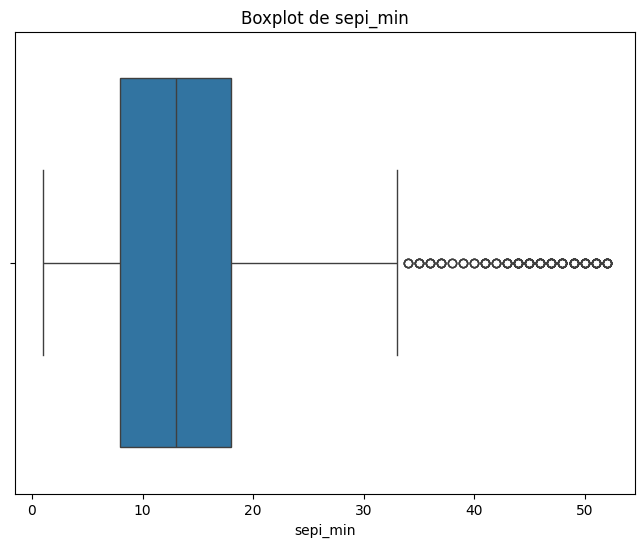

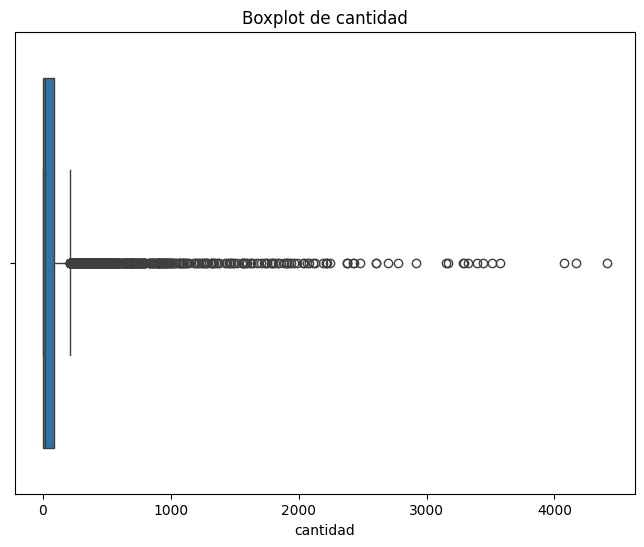

In [67]:
#Se verificaran outliers en las columnas sepi_min y cantidad
import matplotlib.pyplot
import seaborn
#Crear boxplots para cada columna
for col in ['sepi_min', 'cantidad']:
  matplotlib.pyplot.figure(figsize=(8, 6))
  seaborn.boxplot(x=tabla_casos[col])
  matplotlib.pyplot.title(f'Boxplot de {col}')
  matplotlib.pyplot.show()



El valor máximo posible en la columna sepi_min es 52, dado que el año tiene 52 semanas. A continuación, se verifica que los valores de dicha columna respeten esta condición.

In [68]:
df_limpio['sepi_min'].max()

52.0

####2.5.1. IQR (Rango Intercuantílico)
Se observa que

In [69]:
q1 = tabla_casos['cantidad'].quantile(0.25)
q3 = tabla_casos['cantidad'].quantile(0.75)
iqr = q3 - q1

limite_superior = q3 + 1.5 * iqr

outliers = tabla_casos[tabla_casos['cantidad'] > limite_superior]
print(limite_superior)
outliers


212.0


provincia_residencia  evento     grupo_etario  sepi_min  cantidad
6            Buenos Aires  Dengue  De 10 a 14 años       7.0     381.0
7            Buenos Aires  Dengue  De 10 a 14 años       8.0     610.0
8            Buenos Aires  Dengue  De 10 a 14 años       9.0     796.0
9            Buenos Aires  Dengue  De 10 a 14 años      10.0    1212.0
10           Buenos Aires  Dengue  De 10 a 14 años      11.0    1252.0
...                   ...     ...              ...       ...       ...
4934          desconocida  Dengue    De 5 a 9 años      15.0     640.0
4935          desconocida  Dengue    De 5 a 9 años      16.0     393.0
4936          desconocida  Dengue    De 5 a 9 años      17.0     474.0
4937          desconocida  Dengue    De 5 a 9 años      18.0     393.0
4938          desconocida  Dengue    De 5 a 9 años      19.0     298.0

[643 rows x 5 columns]

En el gráfico boxplot de la variable "sepi_min" (semana epidemiológica mínima), se observa que la mayoría de los casos se concentran entre las semanas epidemiológicas 0 y 30. Sin embargo, existen algunos casos atípicos que se distribuyen en semanas posteriores a ese rango. Se verificó que no hay datos erróneos, ya que el valor máximo registrado es 52, lo cual es consistente con la cantidad total de semanas en un año.

Por otro lado, en el boxplot de la variable "cantidad", la mayoría de los valores se encuentran entre 0 y aproximadamente 100. No obstante, se identifican valores atípicos considerablemente más elevados. Estos valores atípicos fueron detectados mediante el cálculo del rango intercuartílico (IQR), lo que permitió identificar semanas con concentraciones inusuales de casos sin descartarlos del conjunto de datos.

#3. Exploración visual de los datos

Con el objetivo de comprender la dinámica de los casos de dengue y zika registrados en 2024, se realizó un análisis exploratorio centrado en tres ejes principales:

1. Evolución temporal: se analizó la cantidad de casos por semana epidemiológica para identificar los períodos de mayor incidencia.

2. Distribución geográfica: se examinaron las provincias más afectadas, a partir del total de casos registrados en cada jurisdicción.

3. Distribución por grupo etario: se evaluó qué grupos de edad concentraron la mayor cantidad de casos, incluyendo también los registros que no contaban con información geográfica.



En este trabajo **se exploraron variables categóricas** (provincia y grupo etario)** y numéricas** (cantidad de casos), utilizando frecuencias, porcentajes y acumulados. Al no trabajar con una variable objetivo ni entrenar modelos, el análisis corresponde a un **enfoque de aprendizaje no supervisado** ya que se buscaron patrones y estructuras en los datos, agrupando datos similares o encontrando relaciones entre diferentes variables.

## 3.1. Evolución de los casos de dengue durante el año 2024.
Se analizó la distribución semanal de los casos de dengue registrados a lo largo del año 2024, utilizando como referencia la variable de semana epidemiológica (sepi_min). Este análisis permitió identificar el comportamiento temporal del brote, visualizando los períodos de aumento, pico y descenso en la cantidad de casos notificados.

In [70]:
#TABLA DE CANTIDAD DE CASOS POR SEMANA
casos_por_semana = df_limpio.groupby('sepi_min')['cantidad'].sum().reset_index()
casos_por_semana

sepi_min  cantidad
0        1.0    5139.0
1        2.0    5996.0
2        3.0    6344.0
3        4.0    7322.0
4        5.0    8164.0
5        6.0   11210.0
6        7.0   16127.0
7        8.0   23411.0
8        9.0   29476.0
9       10.0   38301.0
10      11.0   51722.0
11      12.0   71968.0
12      13.0   67817.0
13      14.0   71217.0
14      15.0   57627.0
15      16.0   40714.0
16      17.0   30470.0
17      18.0   19771.0
18      19.0   11597.0
19      20.0    4425.0
20      21.0    1772.0
21      22.0     488.0
22      23.0     222.0
23      24.0     275.0
24      25.0     180.0
25      26.0     199.0
26      27.0      16.0
27      28.0       9.0
28      29.0       3.0
29      30.0       4.0
30      31.0       8.0
31      32.0       8.0
32      33.0      10.0
33      34.0       6.0
34      35.0       7.0
35      36.0       7.0
36      37.0       6.0
37      38.0       5.0
38      39.0       6.0
39      40.0       6.0
40      41.0      11.0
41      42.0       8.0
42      43.0      13.0
43      44.0      18.0
44      45.0      21.0
45      46.0      20.0
46      47.0      27.0
47      48.0      14.0
48      49.0      23.0
49      50.0      19.0
50      51.0      19.0
51      52.0      19.0

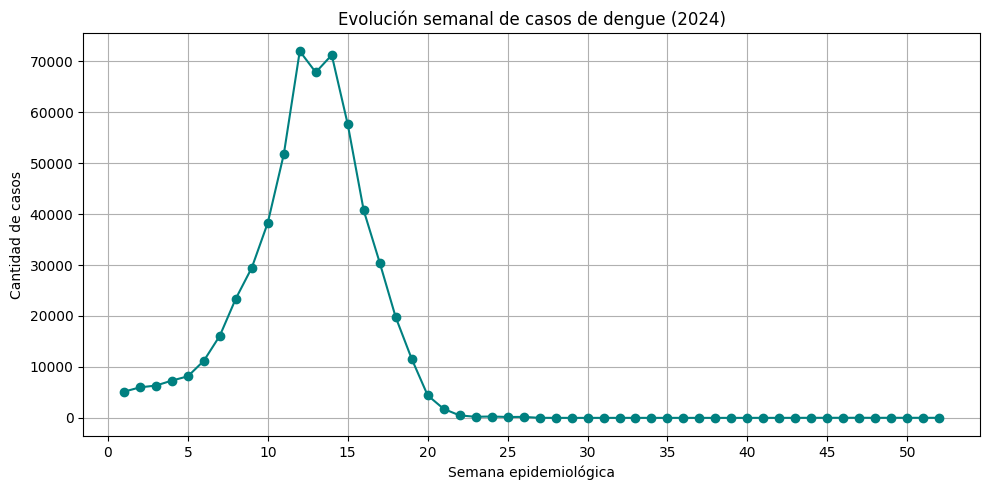

In [71]:
import matplotlib.pyplot as plt
casos_por_semana = df_limpio.groupby('sepi_min')['cantidad'].sum().reset_index()

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(casos_por_semana['sepi_min'], casos_por_semana['cantidad'], marker='o', color= 'teal')
plt.title('Evolución semanal de casos de dengue (2024)')
plt.xlabel('Semana epidemiológica')
plt.ylabel('Cantidad de casos')
plt.xticks(ticks=range(0, 53, 5))
plt.grid(True)
plt.tight_layout()
plt.show()

En el gráfico se observa un fuerte aumento en la cantidad de casos de dengue entre las semanas epidemiológicas 5 y 14, con un pico máximo alrededor de las semanas 12 y 14, donde se superaron los 70.000 casos semanales.

A partir de la semana 15, los casos comienzan a descender rápidamente, y a partir de la semana 20 los valores se mantienen bajos y estables hasta el final del año.

Este patrón sugiere un brote bien definido, con una rápida propagación durante el primer trimestre del año, seguido de una caída abrupta.

A continuación se analiza con mayor detalle la magnitud del este brote y su peso relativo en el total anual.

In [72]:
#CANTIDAD DE CASOS TOTALES
total_anual = casos_por_semana['cantidad'].sum()
print (total_anual)

#SE DEFINE EL PERÍODO CRÍTICO (> 10000 CASOS)
periodo_critico = (casos_por_semana[casos_por_semana['cantidad'] > 10000]).reset_index()
periodo_critico

#FECHA DEL PERÍODO CRÍTICO
import datetime

# Año de referencia
año = 2024

# Semanas 5-18, día 1
fecha_semana5 = datetime.date.fromisocalendar(año, 5, 1)
print(f"La semana 5 de {año} empieza el {fecha_semana5.strftime('%d/%m/%Y')}")

fecha_semana18 = datetime.date.fromisocalendar(año, 18, 1)
print(f"La semana 18 de {año} empieza el {fecha_semana18.strftime('%d/%m/%Y')}")

582267.0
La semana 5 de 2024 empieza el 29/01/2024
La semana 18 de 2024 empieza el 29/04/2024


In [73]:
#CANTIDAD DE CASOS EN EL PERÍODO CRÍTICO
total_periodo_critico = periodo_critico['cantidad'].sum()
print(total_periodo_critico)

# CALCULO DE PORCENTAJE
porcentaje = (total_periodo_critico / total_anual) * 100
print(round(porcentaje, 2))

541428.0
92.99


El 92,99 % de los casos de dengue registrados en 2024 ocurrieron entre los meses de febrero y abril, lo que evidencia la concentración del brote en ese período.

###3.1.1. Aplicación de clustering no supervisado
Se agruparán las semanas epidemiológicas según el comportamiento del brote de dengue.

**Objetivo:**
Identificar grupos de semanas que compartan características similares en cuanto a cantidad de casos, para distinguir automáticamente las fases del brote (inicio, pico, descenso).

Se decidió utilizar el modelo de agrupamiento KMeans, para el cual se seleccionó como característica principal la cantidad de casos confirmados por semana epidemiológica, ya que esta variable refleja directamente la intensidad del brote en cada período.



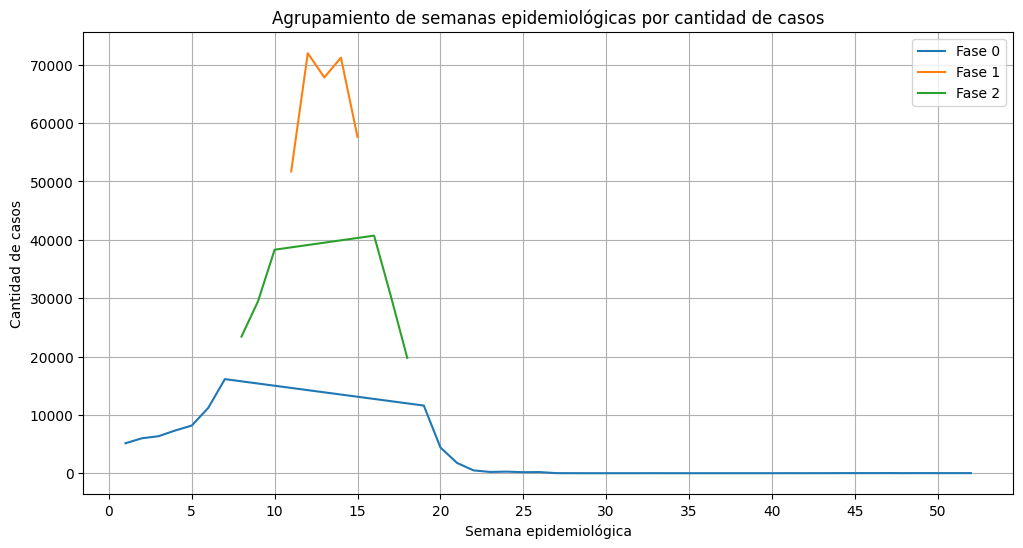

In [74]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Datos: cantidad de casos por semana
casos_por_semana

# 2. Normalización
scaler = StandardScaler()
casos_norm = scaler.fit_transform(casos_por_semana[['cantidad']])

#IMPLEMENTACIÓN Y ENTRENAMIENTO DEL MODELO
# 3. Aplicación de KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
casos_por_semana['cluster'] = kmeans.fit_predict(casos_norm)

# 4. Visualizar
plt.figure(figsize=(12, 6))
for c in sorted(casos_por_semana['cluster'].unique()):
    data = casos_por_semana[casos_por_semana['cluster'] == c]
    plt.plot(data['sepi_min'], data['cantidad'], label=f'Fase {c}')

plt.title('Agrupamiento de semanas epidemiológicas por cantidad de casos')
plt.xlabel('Semana epidemiológica')
plt.ylabel('Cantidad de casos')
plt.xticks(ticks=range(0, 53, 5))
plt.legend()
plt.grid(True)
plt.show()

Fase 0: cantidades bajas, indica el inicio y final del brote.

Fase 1: tiene un pico claro y alto, representa el pico máximo del brote.

Fase 2: tiene una tendencia alta pero decreciente, representa el descenso o la etapa posterior al pico.


###3.1.2. Evaluación del modelo
Se utilizará el **Índice de Silueta en Kmeans**, que mide qué tan similar es un objeto a su propio clúster en comparación con otros clústeres.

Donde:

-1 mala  agrupación

1 optima agrupación



In [75]:
#EVALUACIÓN DEL MODELO NO SUPERVISADO

from sklearn.metrics import silhouette_score

indice = silhouette_score(casos_norm, casos_por_semana['cluster'])
print(f"Índice de Silueta: {indice:.2f}")

Índice de Silueta: 0.81


Se evaluó la calidad del agrupamiento mediante el índice de Silueta, obteniendo un valor de 0.81, lo que indica una buena separación entre los grupos formados. Además, la visualización de los clusters permitió identificar diferencias claras entre las semanas con baja, media y alta cantidad de casos, lo que se corresponde con el análisis previo que mostró que la mayor concentración de casos ocurrió entre febrero y abril.

##3.2. Provincias más afectadas por el virus del Dengue en 2024.

Las provincias con mayor número de casos de dengue en 2024 reflejan las zonas más afectadas por el virus.

In [76]:
casos_por_provincia = tabla_casos.groupby('provincia_residencia')['cantidad'].sum().reset_index()
casos_por_provincia

provincia_residencia  cantidad
0          Buenos Aires  109563.0
1                  CABA   24367.0
2             Catamarca   10861.0
3                 Chaco   21424.0
4                Chubut      64.0
5            Corrientes   10813.0
6               Córdoba  103924.0
7            Entre Ríos   19400.0
8               Formosa   10721.0
9                 Jujuy   14137.0
10             La Pampa     552.0
11             La Rioja   11734.0
12              Mendoza    4786.0
13             Misiones   18285.0
14              Neuquén     177.0
15            Río Negro      99.0
16                Salta   24114.0
17             San Juan    2155.0
18             San Luis    3880.0
19           Santa Cruz     226.0
20             Santa Fe   61417.0
21  Santiago del Estero   18812.0
22     Tierra del Fuego     159.0
23              Tucumán   83377.0
24          desconocida   27220.0

Se observa que una parte importante de los casos reportados no tiene asignada la provincia de origen, lo que dificulta un análisis completo y preciso, por lo que se eliminarán estos datos. Además, los datos correspondientes a CABA se sumarán a los casos de la provincia de Buenos Aires.

In [77]:
#CABA forma parte de la provincia de Buenos Aires, por lo que se suman estos valores
cant_ba = casos_por_provincia[casos_por_provincia['provincia_residencia'] == 'Buenos Aires']['cantidad'].sum()
cant_caba = casos_por_provincia[casos_por_provincia['provincia_residencia'] == 'CABA']['cantidad'].sum()
total_ba = cant_ba + cant_caba
print(total_ba)

133930.0


In [78]:
#Actualizacion de tabla
casos_por_provincia.loc[casos_por_provincia['provincia_residencia'] == 'Buenos Aires', 'cantidad'] = total_ba
casos_por_provincia.drop(casos_por_provincia[casos_por_provincia['provincia_residencia'] == ('CABA' and 'desconocida')].index, inplace=True)
casos_por_provincia.reset_index()

index provincia_residencia  cantidad
0       0         Buenos Aires  133930.0
1       1                 CABA   24367.0
2       2            Catamarca   10861.0
3       3                Chaco   21424.0
4       4               Chubut      64.0
5       5           Corrientes   10813.0
6       6              Córdoba  103924.0
7       7           Entre Ríos   19400.0
8       8              Formosa   10721.0
9       9                Jujuy   14137.0
10     10             La Pampa     552.0
11     11             La Rioja   11734.0
12     12              Mendoza    4786.0
13     13             Misiones   18285.0
14     14              Neuquén     177.0
15     15            Río Negro      99.0
16     16                Salta   24114.0
17     17             San Juan    2155.0
18     18             San Luis    3880.0
19     19           Santa Cruz     226.0
20     20             Santa Fe   61417.0
21     21  Santiago del Estero   18812.0
22     22     Tierra del Fuego     159.0
23     23              Tucumán   83377.0

In [79]:
# Ordenar de mayor a menor casos
casos_por_provincia = casos_por_provincia.sort_values(by='cantidad', ascending=False)

# Mostrar el resultado
casos_por_provincia

provincia_residencia  cantidad
0          Buenos Aires  133930.0
6               Córdoba  103924.0
23              Tucumán   83377.0
20             Santa Fe   61417.0
1                  CABA   24367.0
16                Salta   24114.0
3                 Chaco   21424.0
7            Entre Ríos   19400.0
21  Santiago del Estero   18812.0
13             Misiones   18285.0
9                 Jujuy   14137.0
11             La Rioja   11734.0
2             Catamarca   10861.0
5            Corrientes   10813.0
8               Formosa   10721.0
12              Mendoza    4786.0
18             San Luis    3880.0
17             San Juan    2155.0
10             La Pampa     552.0
19           Santa Cruz     226.0
14              Neuquén     177.0
22     Tierra del Fuego     159.0
15            Río Negro      99.0
4                Chubut      64.0

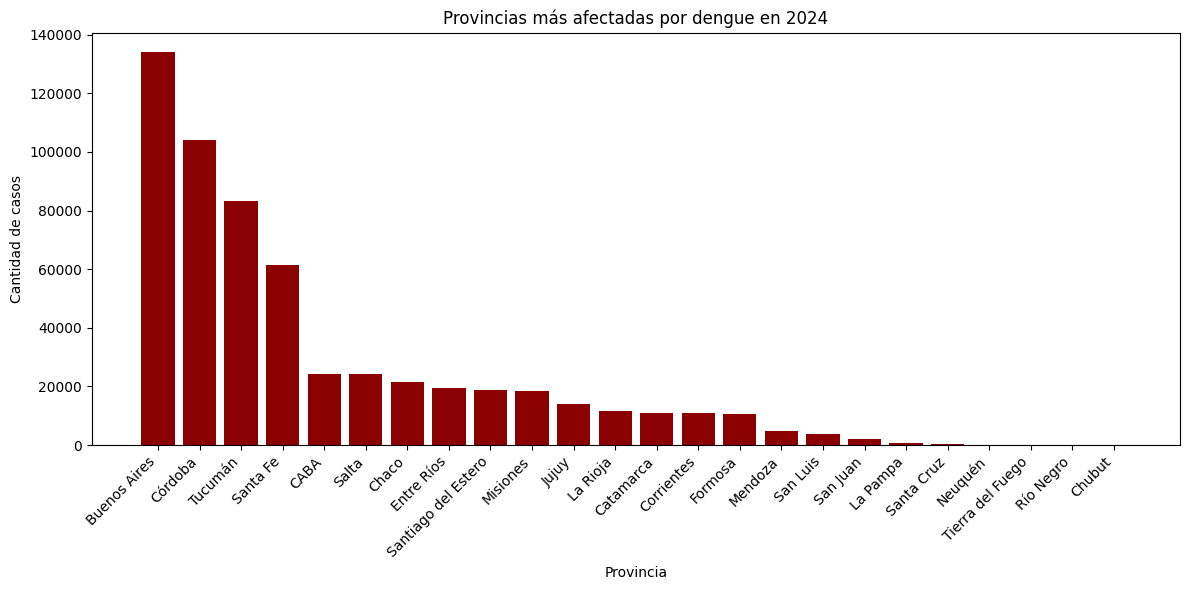

Text(0.5, 1.0, 'Proporción de casos por provincia en 2024')

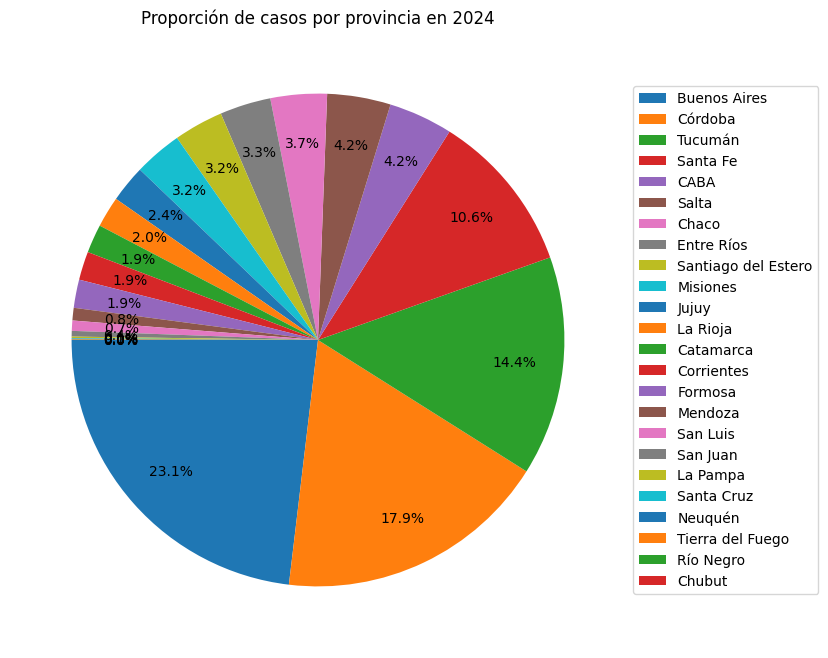

In [80]:
#Grafico para visualizar los datos
import matplotlib.pyplot as plt

#Grafico de barras
plt.figure(figsize=(12,6))
plt.bar(casos_por_provincia['provincia_residencia'], casos_por_provincia['cantidad'], color='darkred')
plt.xticks(rotation=45, ha='right')
plt.title('Provincias más afectadas por dengue en 2024')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de casos')
plt.tight_layout()
plt.show()

#Grafico de torta
plt.figure(figsize=(8,8))
plt.pie(
    casos_por_provincia['cantidad'],
    labels=None,
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=180)
plt.legend(casos_por_provincia['provincia_residencia'], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Proporción de casos por provincia en 2024')


###3.2.1. Generación de mapa de densidades a partir de datos por provincia

In [55]:
#Carga del archivo shp a utilizar
import zipfile
import geopandas as gpd

# Descomprimir el archivo ZIP
with zipfile.ZipFile('/content/provinciaPolygon.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')
    print("Archivo descomprimido exitosamente.")

# 1. Leer el shapefile
gdf = gpd.read_file('/content/provinciaPolygon.zip')

# 2. Agregar datos (ejemplo: nueva columna)
gdf['cant_prov'] = ''  # o cargar de otro DataFrame

# 3. Guardar nuevamente como shapefile
gdf.to_file('/content/provinciaPolygon.zip_modificado.shp')

gdf.head()

Archivo descomprimido exitosamente.


gid                    fna        gna       nam  \
0   26  Provincia de San Luis  Provincia  San Luis   
1   27  Provincia de Santa Fe  Provincia  Santa Fe   
2   28   Provincia de Tucuman  Provincia   Tucuman   
3   29   Provincia de Mendoza  Provincia   Mendoza   
4   30     Provincia de Jujuy  Provincia     Jujuy   

                                            geometry cant_prov  
0  POLYGON ((-67.05547 -31.85605, -67.05 -31.8574...            
1  POLYGON ((-61.04639 -27.998, -61.00805 -27.998...            
2  POLYGON ((-65.35915 -26.05944, -65.35868 -26.0...            
3  POLYGON ((-70.10797 -32.79905, -70.10773 -32.7...            
4  POLYGON ((-66.20766 -21.78835, -66.19414 -21.7...

Ahora se le agregan los valores correspondientes

In [81]:
import unicodedata

#  Remover acentos de provincias en la tabla casos_por_provincia
def quitar_acentos(texto):
    if isinstance(texto, str):
        return unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8').lower()
    else:
        return texto

# Aplicar a la columna de provincia del dataframe
casos_por_provincia['provincia_residencia_normalizada'] = casos_por_provincia['provincia_residencia'].apply(quitar_acentos)
casos_por_provincia

# Aplicar a la columna de provincia del geodataframe
gdf['nam'] = gdf['nam'].apply(quitar_acentos)
gdf


gid                               fna        gna                  nam  \
0    26             Provincia de San Luis  Provincia             san luis   
1    27             Provincia de Santa Fe  Provincia             santa fe   
2    28              Provincia de Tucuman  Provincia              tucuman   
3    29              Provincia de Mendoza  Provincia              mendoza   
4    30                Provincia de Jujuy  Provincia                jujuy   
5    31  Provincia de Santiago del Estero  Provincia  santiago del estero   
6    32              Provincia de Cordoba  Provincia              cordoba   
7    33             Provincia de La Pampa  Provincia             la pampa   
8    34               Provincia del Chaco  Provincia                chaco   
9    35              Provincia de Formosa  Provincia              formosa   
10   36           Provincia de Santa Cruz  Provincia           santa cruz   
11   37              Provincia del Chubut  Provincia               chubut   
12   38             Provincia de San Juan  Provincia             san juan   
13   39            Provincia de Rio Negro  Provincia            rio negro   
14   40             Provincia de Misiones  Provincia             misiones   
15   41             Provincia del Neuquen  Provincia              neuquen   
16   42             Provincia de La Rioja  Provincia             la rioja   
17   43            Provincia de Catamarca  Provincia            catamarca   
18   44                Provincia de Salta  Provincia                salta   
19   45         Provincia de Buenos Aires  Provincia         buenos aires   
20   46     Provincia de Tierra del Fuego  Provincia     tierra del fuego   
21   47           Provincia de Entre Rios  Provincia           entre rios   
22   48           Provincia de Corrientes  Provincia           corrientes   

                                             geometry cant_prov  
0   POLYGON ((-67.05547 -31.85605, -67.05 -31.8574...            
1   POLYGON ((-61.04639 -27.998, -61.00805 -27.998...            
2   POLYGON ((-65.35915 -26.05944, -65.35868 -26.0...            
3   POLYGON ((-70.10797 -32.79905, -70.10773 -32.7...            
4   POLYGON ((-66.20766 -21.78835, -66.19414 -21.7...            
5   POLYGON ((-62.37913 -25.65195, -62.35185 -25.6...            
6   POLYGON ((-63.89431 -29.6286, -63.87386 -29.63...            
7   POLYGON ((-63.38588 -35.01093, -63.38588 -35.0...            
8   POLYGON ((-62.32434 -24.12318, -62.31959 -24.1...            
9   POLYGON ((-62.31201 -22.48666, -62.31056 -22.4...            
10  MULTIPOLYGON (((-67.59571 -45.99987, -67.59569...            
11  MULTIPOLYGON (((-67.75057 -41.99999, -67.50038...            
12  POLYGON ((-69.61059 -28.4139, -69.60571 -28.41...            
13  MULTIPOLYGON (((-68.23829 -37.58522, -68.23727...            
14  MULTIPOLYGON (((-54.10906 -25.53982, -54.11194...            
15  POLYGON ((-71.1076 -37.92983, -71.1076 -37.929...            
16  POLYGON ((-68.5207 -27.82151, -68.51999 -27.82...            
17  POLYGON ((-69.07308 -27.70956, -69.07296 -27.7...            
18  POLYGON ((-62.81148 -22.03023, -62.81271 -22.0...            
19  MULTIPOLYGON (((-60.24091 -33.27285, -60.22821...            
20  MULTIPOLYGON (((-25 -75.87687, -25 -76.11135, ...            
21  POLYGON ((-58.58534 -30.15902, -58.58449 -30.1...            
22  MULTIPOLYGON (((-57.97099 -27.27499, -57.96509...

In [82]:
#Unir el dataframe con el geodataframe
gdf_merged = gdf.merge(casos_por_provincia, left_on='nam', right_on='provincia_residencia_normalizada', how='left')
gdf_merged


gid                               fna        gna                  nam  \
0    26             Provincia de San Luis  Provincia             san luis   
1    27             Provincia de Santa Fe  Provincia             santa fe   
2    28              Provincia de Tucuman  Provincia              tucuman   
3    29              Provincia de Mendoza  Provincia              mendoza   
4    30                Provincia de Jujuy  Provincia                jujuy   
5    31  Provincia de Santiago del Estero  Provincia  santiago del estero   
6    32              Provincia de Cordoba  Provincia              cordoba   
7    33             Provincia de La Pampa  Provincia             la pampa   
8    34               Provincia del Chaco  Provincia                chaco   
9    35              Provincia de Formosa  Provincia              formosa   
10   36           Provincia de Santa Cruz  Provincia           santa cruz   
11   37              Provincia del Chubut  Provincia               chubut   
12   38             Provincia de San Juan  Provincia             san juan   
13   39            Provincia de Rio Negro  Provincia            rio negro   
14   40             Provincia de Misiones  Provincia             misiones   
15   41             Provincia del Neuquen  Provincia              neuquen   
16   42             Provincia de La Rioja  Provincia             la rioja   
17   43            Provincia de Catamarca  Provincia            catamarca   
18   44                Provincia de Salta  Provincia                salta   
19   45         Provincia de Buenos Aires  Provincia         buenos aires   
20   46     Provincia de Tierra del Fuego  Provincia     tierra del fuego   
21   47           Provincia de Entre Rios  Provincia           entre rios   
22   48           Provincia de Corrientes  Provincia           corrientes   

                                             geometry cant_prov  \
0   POLYGON ((-67.05547 -31.85605, -67.05 -31.8574...             
1   POLYGON ((-61.04639 -27.998, -61.00805 -27.998...             
2   POLYGON ((-65.35915 -26.05944, -65.35868 -26.0...             
3   POLYGON ((-70.10797 -32.79905, -70.10773 -32.7...             
4   POLYGON ((-66.20766 -21.78835, -66.19414 -21.7...             
5   POLYGON ((-62.37913 -25.65195, -62.35185 -25.6...             
6   POLYGON ((-63.89431 -29.6286, -63.87386 -29.63...             
7   POLYGON ((-63.38588 -35.01093, -63.38588 -35.0...             
8   POLYGON ((-62.32434 -24.12318, -62.31959 -24.1...             
9   POLYGON ((-62.31201 -22.48666, -62.31056 -22.4...             
10  MULTIPOLYGON (((-67.59571 -45.99987, -67.59569...             
11  MULTIPOLYGON (((-67.75057 -41.99999, -67.50038...             
12  POLYGON ((-69.61059 -28.4139, -69.60571 -28.41...             
13  MULTIPOLYGON (((-68.23829 -37.58522, -68.23727...             
14  MULTIPOLYGON (((-54.10906 -25.53982, -54.11194...             
15  POLYGON ((-71.1076 -37.92983, -71.1076 -37.929...             
16  POLYGON ((-68.5207 -27.82151, -68.51999 -27.82...             
17  POLYGON ((-69.07308 -27.70956, -69.07296 -27.7...             
18  POLYGON ((-62.81148 -22.03023, -62.81271 -22.0...             
19  MULTIPOLYGON (((-60.24091 -33.27285, -60.22821...             
20  MULTIPOLYGON (((-25 -75.87687, -25 -76.11135, ...             
21  POLYGON ((-58.58534 -30.15902, -58.58449 -30.1...             
22  MULTIPOLYGON (((-57.97099 -27.27499, -57.96509...             

   provincia_residencia  cantidad provincia_residencia_normalizada  
0              San Luis    3880.0                         san luis  
1              Santa Fe   61417.0                         santa fe  
2               Tucumán   83377.0                          tucuman  
3               Mendoza    4786.0                          mendoza  
4                 Jujuy   14137.0                            jujuy  
5   Santiago del Estero   18812.0              santiago del estero  
6               Córdoba  103924.0                          cord

In [83]:
#DESCARGAR SHP CON DATOS DE CANTIDAD DE CASOSO DE DENGUE POR PROVINCIA
gdf_merged.to_file("/content/provincias_con_datos.shp", driver='ESRI Shapefile')

/tmp/ipython-input-684664485.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_merged.to_file("/content/provincias_con_datos.shp", driver='ESRI Shapefile')
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'provincia_residencia' to 'provincia_'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'provincia_residencia_normalizada' to 'provinci_1'
  ogr_write(


##3.3 Cantidad de casos según grupo etario
Se analiza que grupos etarios fueron los más afectados por el virus del Dengue en 2024.

In [84]:
casos_por_edad = tabla_casos.groupby('grupo_etario')['cantidad'].sum().reset_index()
casos_por_edad = casos_por_edad.sort_values(by='cantidad', ascending=False)
casos_por_edad

grupo_etario  cantidad
7                  De 45 a 65 años  124167.0
5                  De 25 a 34 años  112857.0
6                  De 35 a 44 años   90832.0
4                  De 20 a 24 años   56259.0
2                  De 15 a 19 años   53826.0
0                  De 10 a 14 años   52075.0
9               Mayores de 65 años   38384.0
8                    De 5 a 9 años   35982.0
3                    De 2 a 4 años   11639.0
1                 De 13 a 24 meses    3238.0
11  Posneonato (29 hasta 365 dÍas)    2737.0
10         Neonato (hasta 28 dÍas)     234.0
12                 Sin Especificar      37.0

Se observa que una parte de los casos reportados no especifican el grupo etario, lo que dificulta un análisis completo y preciso, por lo que se eliminarán estos datos.

In [85]:
casos_por_edad.drop(casos_por_edad[casos_por_edad['grupo_etario'] == 'Sin Especificar'].index, inplace=True)
casos_por_edad.reset_index()

index                    grupo_etario  cantidad
0       7                 De 45 a 65 años  124167.0
1       5                 De 25 a 34 años  112857.0
2       6                 De 35 a 44 años   90832.0
3       4                 De 20 a 24 años   56259.0
4       2                 De 15 a 19 años   53826.0
5       0                 De 10 a 14 años   52075.0
6       9              Mayores de 65 años   38384.0
7       8                   De 5 a 9 años   35982.0
8       3                   De 2 a 4 años   11639.0
9       1                De 13 a 24 meses    3238.0
10     11  Posneonato (29 hasta 365 dÍas)    2737.0
11     10         Neonato (hasta 28 dÍas)     234.0

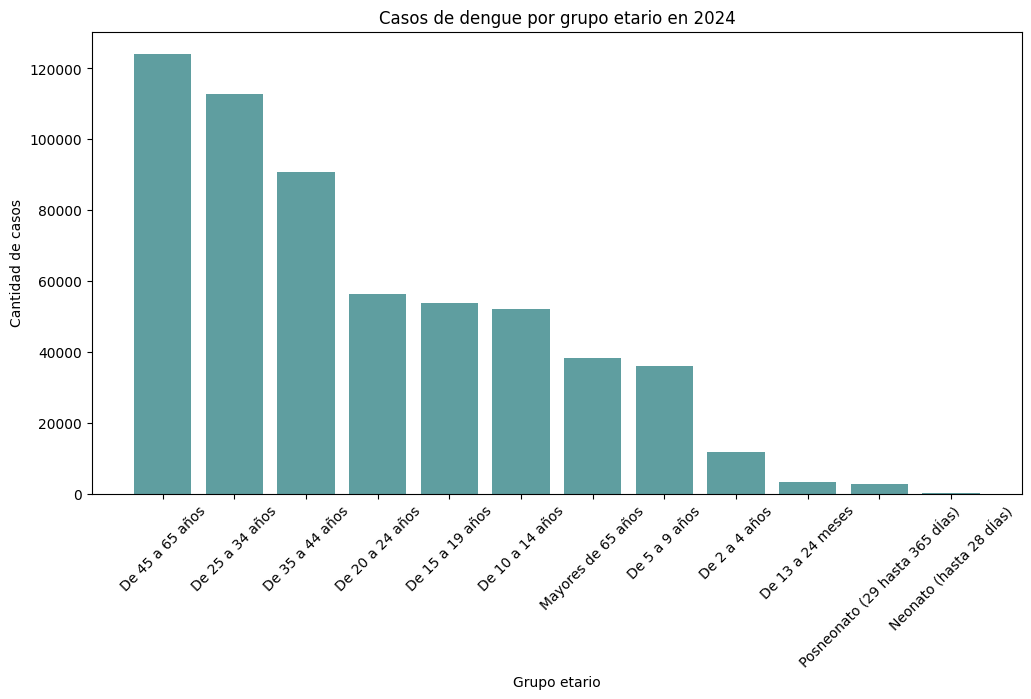

In [86]:
#GRAFICO DE BARRAS A PARTIR DE LA TABLA ANTERIOR
plt.figure(figsize=(12,6))
plt.bar(casos_por_edad['grupo_etario'], casos_por_edad['cantidad'], color='cadetblue')
plt.xticks(rotation=45)
plt.title('Casos de dengue por grupo etario en 2024')
plt.xlabel('Grupo etario')
plt.ylabel('Cantidad de casos')
plt.show()

In [87]:
#CANTIDAD DE CASOS TOTALES
total_anual = casos_por_edad['cantidad'].sum()
print (total_anual)

#PORCENTAJES
porcentajes = ((casos_por_edad['cantidad'] / total_anual) * 100).round(2)
casos_por_edad['porcentaje'] = porcentajes
casos_por_edad

582230.0


grupo_etario  cantidad  porcentaje
7                  De 45 a 65 años  124167.0       21.33
5                  De 25 a 34 años  112857.0       19.38
6                  De 35 a 44 años   90832.0       15.60
4                  De 20 a 24 años   56259.0        9.66
2                  De 15 a 19 años   53826.0        9.24
0                  De 10 a 14 años   52075.0        8.94
9               Mayores de 65 años   38384.0        6.59
8                    De 5 a 9 años   35982.0        6.18
3                    De 2 a 4 años   11639.0        2.00
1                 De 13 a 24 meses    3238.0        0.56
11  Posneonato (29 hasta 365 dÍas)    2737.0        0.47
10         Neonato (hasta 28 dÍas)     234.0        0.04

Se definieron como grupos etarios críticos aquellos que, en conjunto, concentraron hasta el 80% del total de casos registrados.

In [88]:
# Cálculo de porcentaje acumulado
casos_por_edad['%acumulado']=casos_por_edad['porcentaje'].cumsum().round(2)
casos_por_edad

grupo_etario  cantidad  porcentaje  %acumulado
7                  De 45 a 65 años  124167.0       21.33       21.33
5                  De 25 a 34 años  112857.0       19.38       40.71
6                  De 35 a 44 años   90832.0       15.60       56.31
4                  De 20 a 24 años   56259.0        9.66       65.97
2                  De 15 a 19 años   53826.0        9.24       75.21
0                  De 10 a 14 años   52075.0        8.94       84.15
9               Mayores de 65 años   38384.0        6.59       90.74
8                    De 5 a 9 años   35982.0        6.18       96.92
3                    De 2 a 4 años   11639.0        2.00       98.92
1                 De 13 a 24 meses    3238.0        0.56       99.48
11  Posneonato (29 hasta 365 dÍas)    2737.0        0.47       99.95
10         Neonato (hasta 28 dÍas)     234.0        0.04       99.99

In [89]:
# Filtrado de grupos que suman hasta el 80%
grupos_criticos = casos_por_edad[casos_por_edad['%acumulado'] <= 80].copy()

grupos_criticos

grupo_etario  cantidad  porcentaje  %acumulado
7  De 45 a 65 años  124167.0       21.33       21.33
5  De 25 a 34 años  112857.0       19.38       40.71
6  De 35 a 44 años   90832.0       15.60       56.31
4  De 20 a 24 años   56259.0        9.66       65.97
2  De 15 a 19 años   53826.0        9.24       75.21

In [90]:
#Se ordenan los grupos etarios de mayor edad a menor edad
# Se extrae el valor mínimo del rango de edad
grupos_criticos['edad_min'] = grupos_criticos['grupo_etario'].str.extract(r'(\d+)').astype(int)

# Se ordena la nueva columna numérica
edades = grupos_criticos.sort_values(by='edad_min', ascending=True)
edades

grupo_etario  cantidad  porcentaje  %acumulado  edad_min
2  De 15 a 19 años   53826.0        9.24       75.21        15
4  De 20 a 24 años   56259.0        9.66       65.97        20
5  De 25 a 34 años  112857.0       19.38       40.71        25
6  De 35 a 44 años   90832.0       15.60       56.31        35
7  De 45 a 65 años  124167.0       21.33       21.33        45

Se observó que el 80 % de los casos registrados en 2024 correspondió a personas de entre 15 y 65 años, lo cual indica una concentración significativa del brote en la población adulta joven y de mediana edad.

#4. Conclusión
El análisis realizado permitió caracterizar el brote de dengue en Argentina durante el año 2024 desde tres enfoques complementarios: temporal, geográfico y etario.

En primer lugar, el estudio de la evolución temporal reveló que la mayor concentración de casos ocurrió entre los meses de febrero y abril, con un claro pico entre las semanas epidemiológicas 10 y 18. Este resultado fue confirmado mediante un modelo de aprendizaje no supervisado (KMeans), que permitió agrupar las semanas epidemiológicas según la cantidad de casos, identificando automáticamente un grupo correspondiente al período crítico del brote.

En segundo lugar, el análisis geográfico identificó a las provincias de Buenos Aires y Córdoba como las más afectadas en términos absolutos, considerando el total de casos registrados por jurisdicción.

Por último, la distribución por grupo etario mostró que el 80% de los casos se concentraron en personas de entre 15 y 65 años.

Este enfoque integral permitió obtener una visión general del brote en función del tiempo, la localización y la edad de los afectados, combinando análisis descriptivo y técnicas de machine learning para fortalecer la interpretación epidemiológica del evento.

#5. Propuestas de implementación
Los resultados del modelo pueden ser utilizados en contextos reales de salud pública para mejorar la planificación y respuesta ante futuros brotes. Por ejemplo:

• Detección temprana de fases críticas del brote:
- Activar alertas sanitarias con anticipación.

- Planificar campañas de prevención antes de que inicie el pico, como programar fumigaciones u operativos sanitarios justo antes de los períodos de mayor riesgo.

- Distribuir recursos médicos (insumos, personal) de forma más eficiente

• Comparación con otras enfermedades:
- Análisis temporal de otros brotes (ej. gripe, COVID-19, bronquiolitis).


